In [1]:
! pip install jieba wordcloud matplotlib
! pip install textblob

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
headers={"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
#設置網站
url = 'https://news.ltn.com.tw/list/breakingnews/world'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
# 提取 h3 标签中的 title 属性值
titles = soup.find_all("h3")
# 將 ResultSet 轉換為字符
text = "\n".join([title.get_text() for title in titles])

In [4]:
titles

[<h3 class="title">中國兒科急診爆滿！小孩躺「露營推車」吊點滴成「移動病房」</h3>,
 <h3 class="title">躲監視器死角「掏鳥」 美獄警強逼受刑人口交</h3>,
 <h3 class="title">大媽往兵馬俑「吐痰丟菸蒂」 網轟：秦始皇不會放過她！</h3>,
 <h3 class="title">抗生素治療！教宗肺部病情 狀況良好且穩定</h3>,
 <h3 class="title">新聞360》中共航母福建號提前海試？專家曝「海鯤號潛艦+2利器」成抗敵王牌！</h3>,
 <h3 class="title">美國街友性侵15歲少女 遭她男友持槍射殺</h3>,
 <h3 class="title">自由說新聞》緬甸「三兄弟聯盟」攻占金三角口岸！共軍催淚彈阻難民畫面曝</h3>,
 <h3 class="title">AI浪潮洗禮 韋氏字典2023年度字彙：真實的</h3>,
 <h3 class="title">深化合作 南韓首次正式參加北約網路防禦演習</h3>,
 <h3 class="title">中國假訊息亂大選 紐時︰台灣的挑戰在於如何持續對抗</h3>,
 <h3 class="title">美軍神盾艦成功解救以色列貨輪 葉門反抗軍立即射飛彈</h3>,
 <h3 class="title">對抗反猶主義！ 英國倫敦5萬人上街表不滿</h3>,
 <h3 class="title">日本松阪牛首獎出爐 競標金額突破630萬</h3>,
 <h3 class="title">加拿大溫尼伯傳槍響 釀3死2重傷</h3>,
 <h3 class="title">以色列官員：摩薩德正與卡達情治部門舉行會談</h3>,
 <h3 class="title">加拿大多倫多2車相撞 4名中國留學生喪命</h3>,
 <h3 class="title">噁！網傳肉品店「用嘴剔羊肉」影片 老闆稱中國傳統老手藝</h3>,
 <h3 class="title">以色列貨輪再遭劫持 葉門政府譴責叛軍「海盜行徑」</h3>,
 <h3 class="title">自由說新聞》俄火砲震撼炸裂畫面曝！戰損較去年同期飆近3倍</h3>,
 <h3 class="title">哈瑪斯逾50名指揮官遭擊斃 被迫與以色列停火換喘息時間</h

In [5]:
# 定义需要删除的连接词列表
stopwords = r"的|了|和|是|就|也|歲|等|因|上|對|遭|向"
# 清理文本
cleaned_text = re.sub(r'[A-Za-z!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)
# 去除停用詞
cleaned_text = re.sub(stopwords, '', cleaned_text)
# 去除數字
cleaned_text = re.sub(r'\d+', '', cleaned_text)
# 去除空白字符
cleaned_text = re.sub(r'\s+', '', cleaned_text)

In [6]:
# 使用 jieba 进行中文分词
seg_list = jieba.cut(cleaned_text, cut_all=False)
words = list(seg_list)
filtered_words = [word for word in words if re.match('[\u4e00-\u9fa50-9]+', word)]
# 統計詞頻
word_freq = Counter(filtered_words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jessica\AppData\Local\Temp\jieba.cache
Loading model cost 1.015 seconds.
Prefix dict has been built successfully.


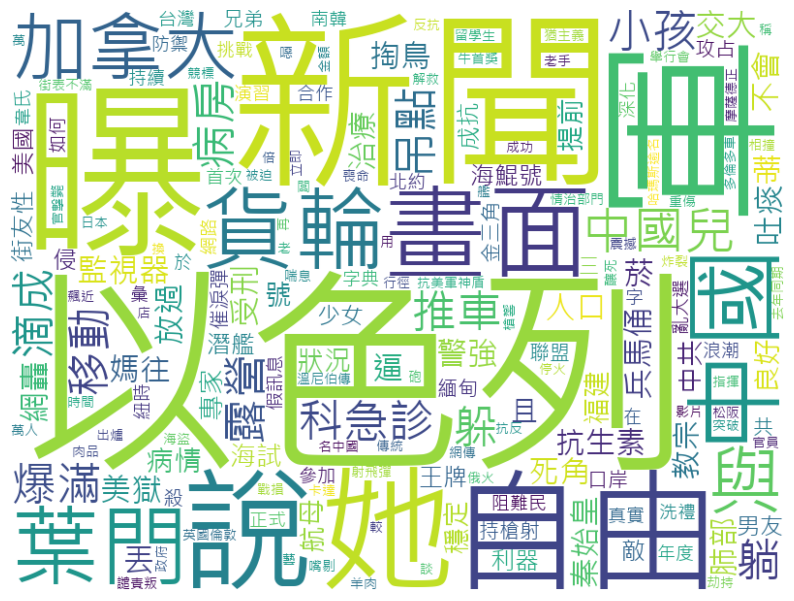

In [7]:
# 设置字体路径
font_path = "c:\Windows\Fonts\msjh.ttc"

# 创建 WordCloud 对象
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    width=800,
    height=600
)

# 生成词云图像
wordcloud = wc.generate_from_frequencies(word_freq)

# 显示词云
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
# 存檔
wordcloud.to_file("wordcloud.png")